$\Large\textbf{Lab 5.} \large\textbf{Exercise 2.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

We discussed in Exercise 1 of this lab about the difficulties involved in computing the exact inverse of Hessian matrix. Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the secant equation. From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercise 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

**1.Question:**  $What \ is \ the \ initial \ choice \ of \ B \ denoted \ by \ B^0 \ ?$  \\

**1. Answer:** 

$Here,\ B \ denoted \ by \ B^0 \  is \  initialized \ with \ B^0 = I, \ $  **i.e. an Identity matrix**.  Idea behind initial choice of an Identity matrix is that: \
1. It is Symmetric.
2. It is positive definite (i.e Its all eigenvalues are positive) 
3. Since, final Hessian approximate is very sensitive to the initial  guess. So we choose the most simplest matrix. 

In [49]:
import numpy as np 
from timeit import default_timer as timer

In [50]:
def evalf(x, n):  
  #Input: x is a numpy array of size n 
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  return sum([2*(x[i]**2-x[i+1])**2 + (x[i]-1)**2 for i in range(n-1)])

In [51]:
def evalg(x, n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  grad = np.zeros(n) #local variable >> cannot be called outside the function directly.
  for i in range(n):
    if i==0:
      grad[i] = 8*(x[i]**2-x[i+1])*x[i]+2*(x[i]-1)
    elif 1<=i<=n-2:
      grad[i] = 8*(x[i]**2-x[i+1])*x[i] + 6*x[i]- 4*x[i-1]**2 - 2
    else:
      grad[i] = -4*(x[i-1]**2-x[i])
  return np.array(grad)

In [52]:
def evalh(x,n):
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #hess = ??
  hess = np.zeros([n,n])
  for i in range(n):
    if i==0:
      hess[i][i] = 8*(x[i]**2-x[i+1]) + 16*x[i] + 2 ; hess[i][i+1] = -8*x[i]
    elif 1<=i<=n-2:
      hess[i][i] = 24*x[i]**2 - 8*x[i+1] + 6
      hess[i][i+1] = -8*x[i]
      hess[i][i-1] = -8*x[i-1]
    else:
      hess[i][i] = 4 ; hess[i][i-1] = hess[i-1][i] # since hessian matrix is a symmetric matrix.

  #check if Hessian is symmetric 
  #print('Is Hessian symmetric? Answer:', np.sum(np.sum(np.subtract(hess,hess.T))) == 0 )

  #check if Hessian is positive definite
  #print('Is Hessian positive definite? Answer:', np.amin(np.linalg.eigvalsh(hess))>0 )
  return hess

In [53]:
def compute_D_k(x,n):
  assert type(x) is np.ndarray
  assert len(x) == n
  if np.linalg.det(evalh(x,n)) == 0:
    raise ValueError('Determinant does not exist. Please check!!')
  return np.linalg.inv(evalh(x,n))

In [54]:
def compute_steplength_backtracking(x, n, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == n
  assert type(gradf) is np.ndarray and len(gradf) == n 
  #assert type(direction) is np.ndarray and len(direction) == n 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  D_k = np.linalg.inv(evalh(x,n))
  while evalf(x + alpha*np.matmul(D_k,-gradf), n) > evalf(x, n) + gamma*alpha*(np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,-gradf)) ):
    alpha = rho*alpha
  return alpha

In [55]:
#line search type 
CONSTANT_STEP_LENGTH = 1
BACKTRACKING_LINE_SEARCH = 2

In [57]:
def find_minimizer_BFGS_method(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == n #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x,n)
  B_k = np.eye(n)
 
  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0]) ; assert alpha_start>=0.
      rho = float(args[1]) ; assert rho>=0.
      gamma = float(args[2]) ; assert gamma>=0.
 
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x_0 = x
    g_0 = evalg(x_0,n)
    B_0 = B_k

    if line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 1.0
    elif line_search_type == BACKTRACKING_LINE_SEARCH:   
      alpha = alpha_start
      gr_t = np.matrix.transpose(g_x)
      #implement the backtracking line search
      while evalf(np.add(x,-alpha*np.matmul(B_k, g_x)), n) > evalf(x, n)-gamma*alpha*np.matmul(gr_t, np.matmul(B_k, g_x)):
        alpha = rho*alpha
      #print('final step length:',alpha) 
      step_length = alpha 
    else:  
      raise ValueError('Line search type unknown. Please check!')    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(B_k, g_x))) #update x = x - step_length*g_x
    g_x = evalg(x,n) #computing gradient at new point
    s_k = x - x_0
    y_k = np.subtract(g_x, g_0)
    mu_k = 1/np.matmul(y_k, s_k)
    A = np.subtract(np.eye(n), mu_k*np.outer(s_k, y_k))
    C = np.subtract(np.eye(n), mu_k*np.outer(y_k, s_k))
    #Implementing the update rule to update B_k+1
    B_k = np.matmul(np.matmul(A, B_0), C) + mu_k*np.outer(s_k, s_k)
    k += 1 #increment iteration     
  return x, k, evalf(x,n)

In [58]:
def find_minimizer_Newton_method(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == n #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0. 
  x = start_x
  g_x = evalg(x, n)
 
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
 
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = np.linalg.inv(evalh(x,n))
    if line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 1.0
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, n, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED') 
    else:  
      raise ValueError('Line search type unknown. Please check!')    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x, n) #compute gradient at new point
  return x, k, evalf(x,n)

${\Large\text{2. SOLUTION:}}$

${\Large\text{BFGS method with Constant Step Length}}$

In [59]:
elapsed_time = []
n = [1000, 2500, 5000, 7500, 10000]
# n=[1,2,3,4,5]
print("For BFGS method with CONSTANT_STEP_LENGTH\n")
for ele in n:
  my_start_x = np.zeros(ele)
  my_tol= 1e-9
  start = timer()
  x_opt, num_iters, f_value = find_minimizer_BFGS_method(my_start_x, ele, my_tol, CONSTANT_STEP_LENGTH)
  end = timer()  
  print("For n = ",ele,",  Time taken: ", end-start,",  Iteration = ",num_iters,", function Value: ", f_value)
  elapsed_time.append(end-start)
  print()

For BFGS method with CONSTANT_STEP_LENGTH



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:909: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:909: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


For n =  1000 ,  Time taken:  2.385974602002534 ,  Iteration =  14 , function Value:  nan



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


For n =  2500 ,  Time taken:  27.16478898799687 ,  Iteration =  13 , function Value:  inf



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in matmul


For n =  5000 ,  Time taken:  198.55383840900322 ,  Iteration =  13 , function Value:  inf



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul


For n =  7500 ,  Time taken:  692.3476013140025 ,  Iteration =  13 , function Value:  nan

For n =  10000 ,  Time taken:  1590.9704535979981 ,  Iteration =  13 , function Value:  nan



In [64]:
elapsed_time1 = elapsed_time
elapsed_time1

[2.385974602002534,
 27.16478898799687,
 198.55383840900322,
 692.3476013140025,
 1590.9704535979981]

**COMMENTS ON OBSERVATIONS:** \
1. From the above outputs it is obvious that in the BFGS method for the constant step length, the function diverges to infinity for $n = 2500 \ and \ 5000$ from the given values of $n \in [1000, 2500, 5000, 7500, 10000]$.
2.For $n = 1000, \ 7500, \ and \ 10000$ we encounter  either an $overflow$ or $Invalid \ value$ **RuntimeWarning**. One of the possible reasons behind this event may be the large values of $n$ that we are considering. Also in python, If an array has a very small or very large determinant, then a call to determinant may return an overflow or underflow Runtime warning.
3. Here, we have also found that, the $BFGS$ method for constant step length converges for $n \leq 5$ 

${\Large\text{Newton's Method with Constant Step Length}}$

In [ ]:
elapsed_time2 = []
n = [1000, 2500, 5000, 7500, 10000]
for ele in n:
  my_start_x = np.zeros(ele)
  my_tol= 1e-9
  start = timer()
  x_opt, k = find_minimizer_Newtonmethod(my_start_x, ele, my_tol, CONSTANT_STEP_LENGTH)
  end = timer()  
  print("For n = ",ele,", Time taken by the Newton's method to find the minimizer is ", end-start,",  Iterations: ",k)
  elapsed_time2.append(end-start)

For n =  1000 , Time taken by the Newton's method to find the minimizer is  1.3562172860001738 ,  Iterations:  9
For n =  2500 , Time taken by the Newton's method to find the minimizer is  14.675770878000094 ,  Iterations:  9
For n =  5000 , Time taken by the Newton's method to find the minimizer is  100.88589235200016 ,  Iterations:  9
For n =  7500 , Time taken by the Newton's method to find the minimizer is  348.44622390999984 ,  Iterations:  9
For n =  10000 , Time taken by the Newton's method to find the minimizer is  803.0955233619998 ,  Iterations:  9


In [68]:
elapsed_time2

[1.3562172860001738,
 14.675770878000094,
 100.88589235200016,
 348.44622390999984,
 803.0955233619998]

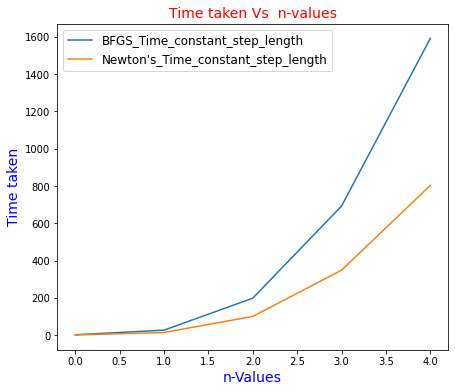

In [77]:
#Plotting Time taken against n-values.
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(elapsed_time1, label=r'$ $')
plt.plot(elapsed_time2,label=r'$ $') 
plt.title('Time taken Vs  n-values', fontsize=14, color = 'r')
plt.xlabel(r'n-Values', fontsize=14, color = 'b')
plt.ylabel(r'Time taken', fontsize=14, color = 'b')
plt.legend(["BFGS_Time_constant_step_length", "Newton's_Time_constant_step_length"],fontsize=12)
plt.show()

**COMMENTS ON OBSERVATIONS:** 
1. For increasing values of $n$ the time taken to find the minimizer increases in case of  Newton's method (with Constant step length)
2. Also it seems that Newton's method is efficient and converges at a much faster rate than the BFGS method (with Constant step length).
3. Here the graph with blue color is actually indicating the time taken to diverge in case of $BFGS$ method.(Because we found that it was converging for $n \leq 5 \ only$ )

${\Large\text{3. SOLUTION:}}$

${\Large\text{BFGS method with Backtracking Line Search}}$

In [ ]:
n = [1000, 2500, 5000, 7500, 10000]
print(" For BFGS method with backtracking line search\n")
elapsed_time3 = []
for ele in n:
  my_start_x = np.zeros(ele)
  my_tol= 1e-9
  start = timer()
  x_opt, num_iters, f_value = find_minimizer_BFGS_method(my_start_x, ele, my_tol, BACKTRACKING_LINE_SEARCH, 0.9, 0.5, 0.5)
  end = timer()  
  print("For n = ",ele,",  Time taken: ", end-start,",  Function value: ",f_value,",  Iteration = ",num_iters )
  elapsed_time3.append(end-start)

 For BFGS method with backtracking line search

For n =  1000 ,  Time taken:  21.72766324500003 ,  Function value:  1.3036066075361508e-20 ,  Iteration =  100
For n =  2500 ,  Time taken:  221.54948016499998 ,  Function value:  1.609050054496448e-20 ,  Iteration =  101
For n =  5000 ,  Time taken:  1633.846557672 ,  Function value:  1.11552682493536e-20 ,  Iteration =  105
For n =  7500 ,  Time taken:  5528.236946733 ,  Function value:  1.0753086925763163e-20 ,  Iteration =  108
For n =  10000 ,  Time taken:  13200.435852655 ,  Function value:  1.7829628562261265e-20 ,  Iteration =  108


In [72]:
elapsed_time3

[21.72766324500003,
 221.54948016499998,
 1633.846557672,
 5528.236946733,
 13200.435852655]

${\Large\text{Newton's Method with Backtracking Line Search}}$

In [48]:
print("\nFor Newton's Method with BACKTRACKING_LINE_SEARCH: ")
N = [1000, 2500, 5000, 7500, 10000]
elapsed_time4 = []
for n in N:
  my_start_x = np.zeros(n)
  my_tol= 1e-9
  start = timer()
  x_opt, num_iters, f_value = find_minimizer_Newton_method(my_start_x, n, my_tol, BACKTRACKING_LINE_SEARCH, 0.9, 0.5,0.5)
  end = timer()  
  print("For n = ", n,",  Time taken: ", end-start,",  function value = ", f_value,",  Iteration = ", num_iters)
  elapsed_time4.append(end-start)


For Newton's Method with BACKTRACKING_LINE_SEARCH: 
For n =  1000 ,  Time taken:  3.7259522790009214 ,  function value =  2.4630941399218953e-21 ,  Iteration =  14
For n =  2500 ,  Time taken:  41.95575666399964 ,  function value =  2.50812212933966e-21 ,  Iteration =  14
For n =  5000 ,  Time taken:  307.843468572999 ,  function value =  2.5831687783692683e-21 ,  Iteration =  14
For n =  7500 ,  Time taken:  1010.9277274259985 ,  function value =  2.6582154273988764e-21 ,  Iteration =  14
For n =  10000 ,  Time taken:  2402.901962690001 ,  function value =  2.7332620764284845e-21 ,  Iteration =  14


In [74]:
elapsed_time4

[3.7259522790009214,
 41.95575666399964,
 307.843468572999,
 1010.9277274259985,
 2402.901962690001]

**comparison:** \\
From the above result we can clearly say that **In case of backtracking line search also, for different values of $n$, the BFGS method takes much more time to converge in comparison to Newton's method** \

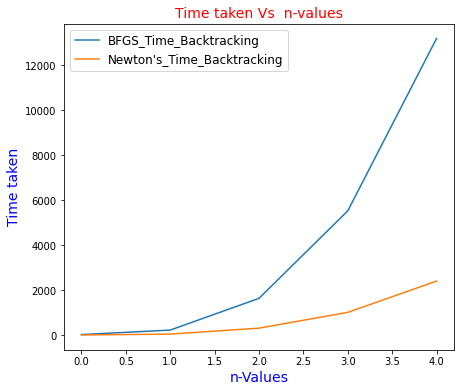

In [76]:
#Plotting Time taken against n-values (For Backtracking Line Search).
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(elapsed_time3, label=r'$ $')
plt.plot(elapsed_time4,label=r'$ $') 
plt.title('Time taken Vs  n-values', fontsize=14, color = 'r')
plt.xlabel(r'n-Values', fontsize=14, color = 'b')
plt.ylabel(r'Time taken', fontsize=14, color = 'b')
plt.legend(["BFGS_Time_Backtracking", "Newton's_Time_Backtracking"],fontsize=12)
plt.show()

**4. COMMENTS:** \
1. From the above graph also we can certainly say that For different values of n $BFGS \ method$ takes more time in comparison to $Newton's \ Method$. 
2. Also it is obvious from the graph that for very small values of $n$ Both $BFGS$ and $Newton's$ Method takes similar time but for very large values of $n$, $BFGS$ method takes very large time to converge in comparison to $Newton's$ method and this $time-gap$ increases with increasing value of $n$.
3. Also for increasing values of $n$, time taken by both the $BFGS$ and the $Newton's$ method increases.